### Problem Statement:
The X Education company requires us to build a model that can help in selecting the most promising leads. In other words a model needs to be build to assign a lead score to the customer to achieve a lead score conversion rate of 80%.

### Goal:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target its potential leads.High lead score means the customer is hot lead i,e likely to convert into paying customer and low lead score means the customer is cold lead i,e very less likely to convert into paying customer.

### Assignmnet steps:
1. Data cleaning
2. Data preparation
3. Modelling: (1) Feature selection and (2) Evaluation


# Importing Libraries

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

### 1) Reading Data

In [3]:
# Reading the dataset
lead_data = pd.read_csv('Leads.csv')

In [4]:
# Displaying the first 5 rows of dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the dimensions of dataset
lead_data.shape

(9240, 37)

In [6]:
# Checking the statistical summary of the dataset
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From the above statistical summary it can be observed that average conversion rate is 38.5% and the average time spent on website 487.7 seconds.

In [7]:
# checking the info for each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2) Data Cleaning

In [8]:
# Checking the null percentage
round(lead_data.isnull().mean()*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

From the above info, it is observed that there are quite a few rows which contains null values  in them which needs to be handled and also there are some categorical columns which can be modified accordingly.

In [9]:
# checking the colums which have level as "Select"
round(lead_data[lead_data == 'Select'].count()/len(lead_data)*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.000
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       0.000
Total Time Spent on Website                       0.000
Page Views Per Visit                              0.000
Last Activity                                     0.000
Country                                           0.000
Specialization                                   21.017
How did you hear about X Education               54.578
What is your current occupation                   0.000
What matters most to you in choosing a course     0.000
Search                                            0.000
Magazine                                        

The columns: Specialization, How did you hear about X Education, Lead Profile, City have level "select" which indicates there are options or the dropdown which were left blank by the customers and are equivalent to null values, hence replacing them with nan.

In [10]:
# Replacing 'Select' with null value
lead_data = lead_data.replace('Select',np.nan)

In [11]:
# Ensuring the replacement of nan
round(lead_data[lead_data == 'Select'].count()/len(lead_data)*100,3)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [12]:
# displaying % of null values in each column
round(lead_data.isna().mean()*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

In [13]:
#checking for duplicates in the data
lead_data_dup = lead_data.duplicated()
print('Number of duplicate rows = %d' % (lead_data_dup.sum()))
lead_data[lead_data_dup]

Number of duplicate rows = 0


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Since Prospect ID and Lead Number are the unique customer indicators, they should not contain duplicates hence ensured that there are NO duplicates in the data.

In [14]:
# Dropping columns with more than 40% null values
lead_data.drop(lead_data.columns[100*lead_data.isnull().mean() >=40],axis=1 , inplace=True)

'Tags' and 'City' columns are having less than 40% values null but it still has 36.2% and 39.7% values respectively missing which is not a big difference and it won't contribute to our model building as well, so it's better to drop it 

In [15]:
lead_data.drop(['Tags','City'],axis=1, inplace=True)

In [16]:
# Rechecking the null values after dropping.
round(lead_data.isna().mean()*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                               

In [17]:
# creating a for loop to see percentage of each unique value in each column of the dataset
for col in lead_data:
    print(col,'::')
    print(round(lead_data[col].value_counts(dropna=False)/len(lead_data)*100,2))
    print('-----------------------------------------------')


Prospect ID ::
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.01
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.01
46befc49-253a-419b-abea-2fd978d2e2b1    0.01
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.01
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.01
                                        ... 
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.01
644099a2-3da4-4d23-9546-7676340a372b    0.01
2a093175-415b-4321-9e69-ed8d9df65a3c    0.01
c66249a3-8500-4c66-a511-312d914573de    0.01
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.01
Name: Prospect ID, Length: 9240, dtype: float64
-----------------------------------------------
Lead Number ::
660737    0.01
603303    0.01
602561    0.01
602557    0.01
602540    0.01
          ... 
630422    0.01
630405    0.01
630403    0.01
630390    0.01
579533    0.01
Name: Lead Number, Length: 9240, dtype: float64
-----------------------------------------------
Lead Origin ::
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead

Quite a few columns like 'Do Not Email','Do Not Call','Search','Magazine','Newspaper Article'etc. have low "yes" values and more "no" values which indicates imbalance in data.

In [18]:
# dropping the columns.
lead_data.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
           'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
           'Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [31]:
# creating a function which plot countplot for the categorical variables needed to analyze
def plot_graph(var):
    ax = sns.countplot(data=lead_data, x=lead_data[var])
    total = len(lead_data[var])
    plt.xticks(rotation = 90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'baseline', xytext = (0, 5), textcoords = 'offset points', rotation=+60, size=8)
    plt.show()
    return

#### Column Country has 26.63 % of missing values

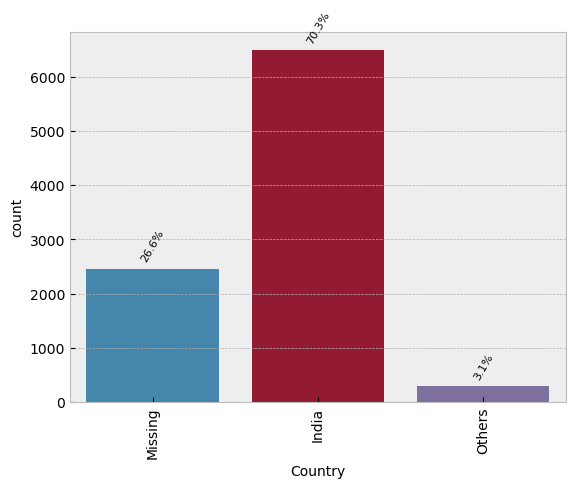

In [32]:
# plotting graph for column 'Country'
plt.style.use('bmh')
plot_graph('Country')

In [33]:
# imputing null values with 'Missing'
lead_data['Country'] = lead_data['Country'].replace(np.nan,'Missing')


As the 'Country' variable is dominated by 'India' followed by 'Missing' so replacing other countries with 'Others'

In [34]:
lead_data['Country'] = np.where(lead_data['Country'].isin(['India','Missing']), lead_data['Country'],'Others')

#### Column 'Specialization' has 36.5% missing values

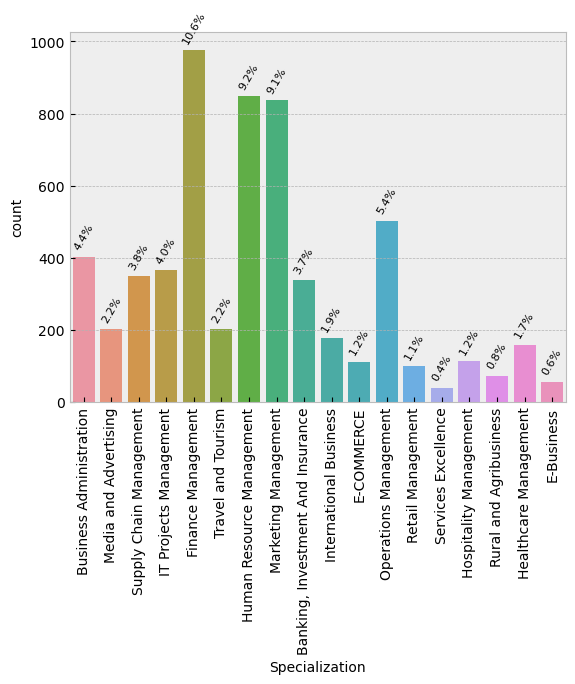

In [35]:
# plotting graph for column 'Specialization'
plot_graph('Specialization')

In [36]:
# imputing null values with 'Other'
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Other')

In [37]:
# count of each unique value in Specialization column
lead_data.Specialization.value_counts()

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Column 'What is your current occupation' has 29.1% missing values

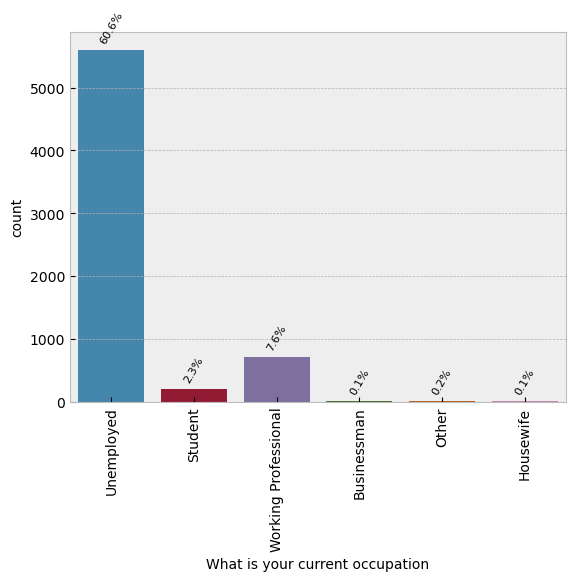

In [38]:
# plotting graph for column 'What is your current occupation'
plot_graph('What is your current occupation')

Since 'What is your current occupation' column has majority unemployed value so replacing missing values with 'Uemployed'

In [39]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

#### Column 'What matters most to you in choosing a course' has 29.3% missing values

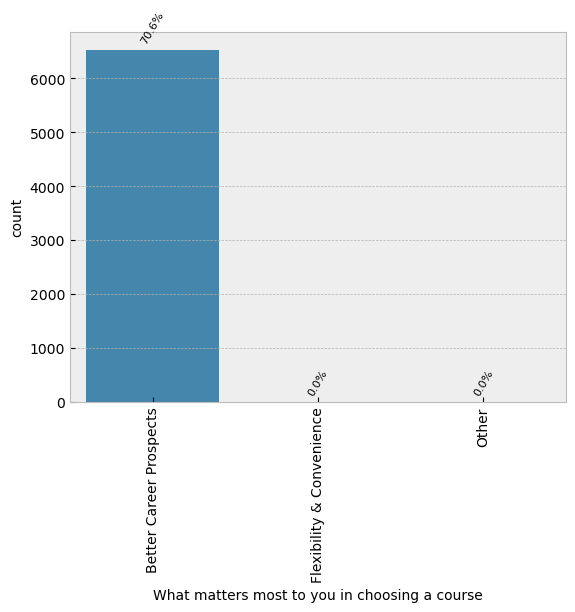

In [40]:
# plotting graph for column 'What matters most to you in choosing a course'
plot_graph('What matters most to you in choosing a course')

In [41]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since "What matters most to you in choosing a course" is highly skewed towards "Better Career Prospects" and remaining missing values or very less in number so it won't be helpful in contributing to model building

So dropping this column

In [42]:
lead_data.drop('What matters most to you in choosing a course', axis=1 , inplace=True)

In [43]:
# checking null value percentage
round(lead_data.isna().mean()*100,3)

Prospect ID                               0.000
Lead Number                               0.000
Lead Origin                               0.000
Lead Source                               0.390
Converted                                 0.000
TotalVisits                               1.483
Total Time Spent on Website               0.000
Page Views Per Visit                      1.483
Last Activity                             1.115
Country                                   0.000
Specialization                            0.000
What is your current occupation           0.000
A free copy of Mastering The Interview    0.000
Last Notable Activity                     0.000
dtype: float64

As "TotalVisits" , "Page Views Per Visit" and "Last Activity" column has less than 1.5% values missing

So we can drop the row having null value as it won't affect our model building

In [44]:
# dropping the rows with null values
lead_data.dropna(inplace=True)

In [45]:
# Rechecking the percentage of each unique value in each column of the dataset
for col in lead_data:
    print(col,'::')
    print(round(lead_data[col].value_counts(dropna=False)/len(lead_data)*100,2))
    print('-----------------------------------------------')


Prospect ID ::
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.01
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    0.01
9757ace3-0656-4400-b519-fe0e3c67599e    0.01
889c1057-97ab-477c-a2b7-423e7df2d226    0.01
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    0.01
                                        ... 
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    0.01
c62678c1-e741-4874-b5cf-500b2e8e2a78    0.01
4e859886-6ae2-462b-abd0-1df6ae65d8bf    0.01
78a9c58c-c287-41e3-a0f5-034061b73343    0.01
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.01
Name: Prospect ID, Length: 9074, dtype: float64
-----------------------------------------------
Lead Number ::
660737    0.01
602411    0.01
602438    0.01
602435    0.01
602420    0.01
          ... 
630128    0.01
630135    0.01
630139    0.01
630158    0.01
579533    0.01
Name: Lead Number, Length: 9074, dtype: float64
-----------------------------------------------
Lead Origin ::
Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead

As we can see that the 'Country' column is highly skewed with India being 71.53% and Missing value being 25.3% which adds no significant importance to model building, so dropping this column

In [46]:
lead_data.drop('Country',axis=1,inplace=True)

In [47]:
# checking null value percentage after removing null values from above column
round(lead_data.isna().mean()*100,3)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Dropping columns 'Prospect ID' and 'Lead Number' as they don't have any quantitative significance and won't contribute in model building

In [48]:
lead_data.drop(['Prospect ID','Lead Number'], axis=1 ,inplace=True)

#### Checking percentage of data retained after cleaning

In [49]:
(len(lead_data.index)/9240)*100

98.2034632034632

We have retained 98.2% of the rows after cleaning the data

In [50]:
# displaying first three rows of dataset
lead_data.head(3)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened


## 4) Handling Outliers

In [51]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


##### There seems to be outliers present in TotalVisits,	Total Time Spent on Website,	Page Views Per Visit columns

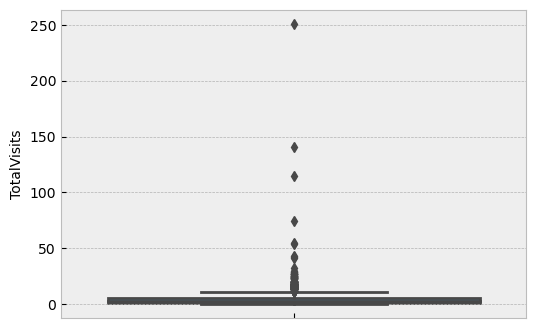

In [52]:
# checking TotalVisits column
plt.figure(figsize=(6,4))
sns.boxplot(data = lead_data, y=lead_data.TotalVisits);

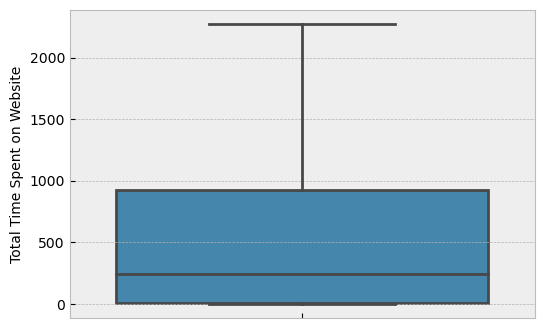

In [53]:
# checking Total Time Spent on Website Page
plt.figure(figsize=(6,4))
sns.boxplot(data = lead_data, y=lead_data["Total Time Spent on Website"]);

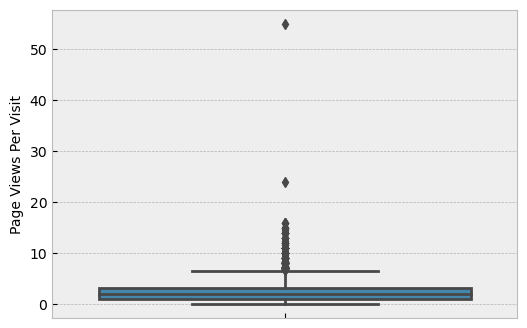

In [54]:
# checking Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(data = lead_data, y=lead_data["Page Views Per Visit"]);

In [55]:
# Treating the outliers by using percentile method, keeping 99 percentile as the upper limit

lead_data = lead_data[lead_data.TotalVisits < np.nanpercentile(lead_data.TotalVisits,99)]
lead_data = lead_data[lead_data["Page Views Per Visit"] < np.nanpercentile(lead_data["Page Views Per Visit"],99)]

In [56]:
#checking the feature variables left
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8863 non-null   object 
 1   Lead Source                             8863 non-null   object 
 2   Converted                               8863 non-null   int64  
 3   TotalVisits                             8863 non-null   float64
 4   Total Time Spent on Website             8863 non-null   int64  
 5   Page Views Per Visit                    8863 non-null   float64
 6   Last Activity                           8863 non-null   object 
 7   Specialization                          8863 non-null   object 
 8   What is your current occupation         8863 non-null   object 
 9   A free copy of Mastering The Interview  8863 non-null   object 
 10  Last Notable Activity                   8863 non-null   obje

# Exploratory Data Analysis

### 1) Univariate Analysis

In [57]:
# creating a list of all the categorical columns
cat_cols = ['Lead Origin', 'Lead Source','Last Activity', 'Specialization','What is your current occupation', 
            'A free copy of Mastering The Interview', 'Last Notable Activity']

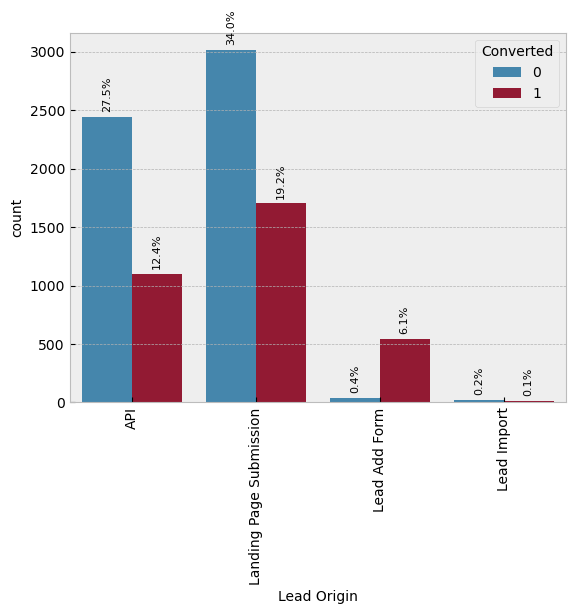

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




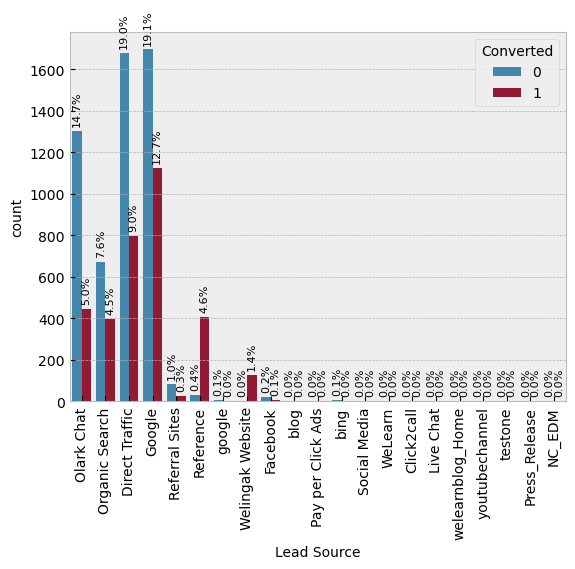

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




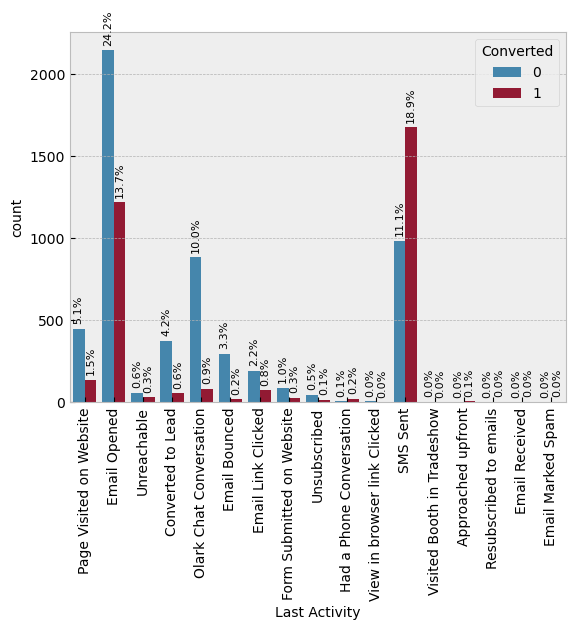

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




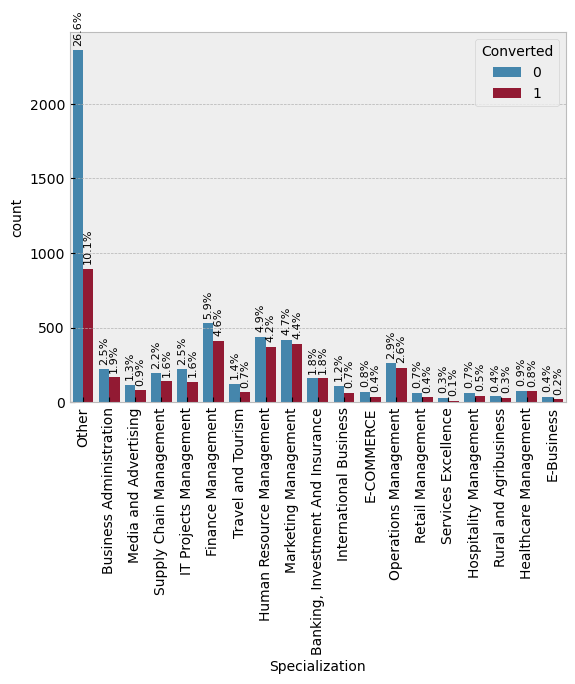

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




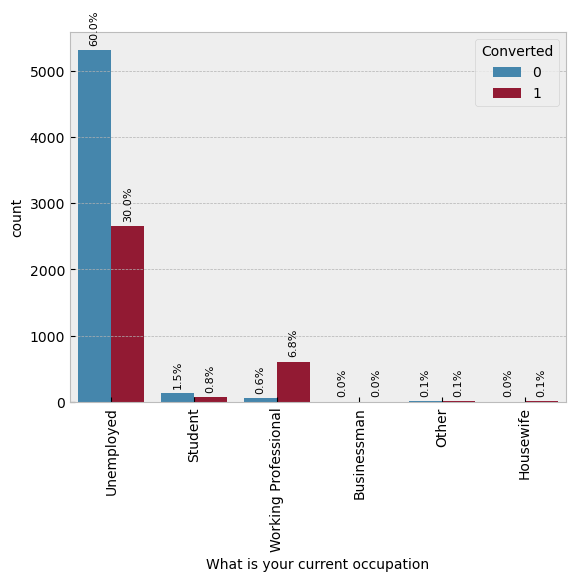

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




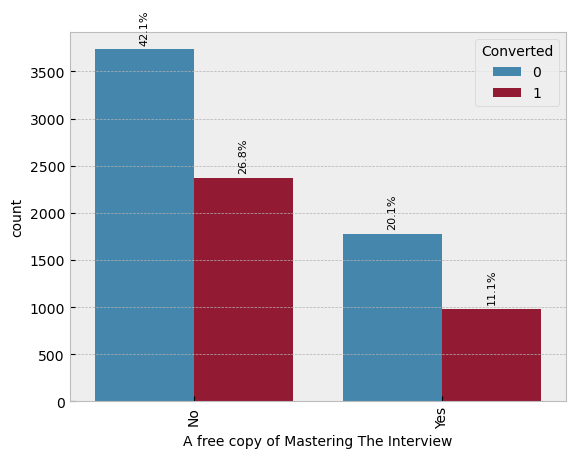

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




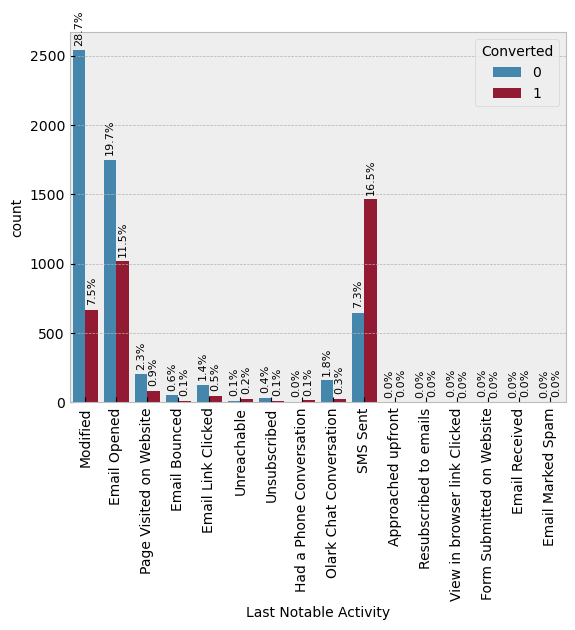

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




In [61]:
# plotting countplot of all the categorical columns using for loop
for cat_col in cat_cols:
    ax = sns.countplot(data=lead_data, x=lead_data[cat_col],hue="Converted")
    total = len(lead_data[cat_col])
    plt.xticks(rotation = 90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'baseline', xytext = (0, 5), textcoords = 'offset points', rotation =+90,size = 8)
    plt.show()
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::\n\n')

### 2) Bivariate Analysis

In [62]:
# creating a list all the columns with numerical values
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

Axes(0.125,0.11;0.775x0.77)


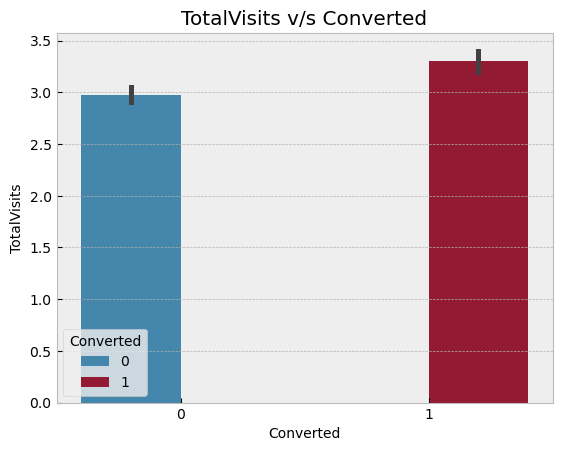

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


Axes(0.125,0.11;0.775x0.77)


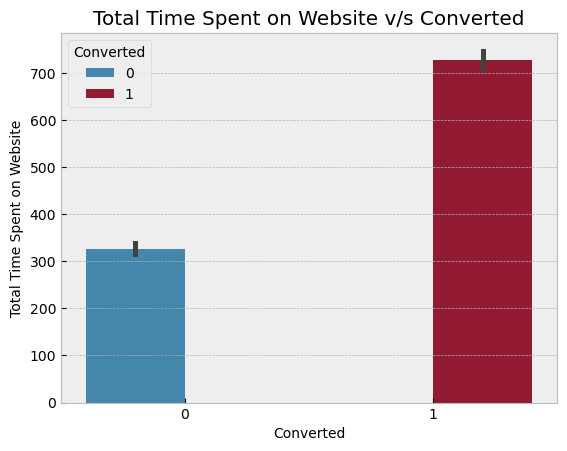

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


Axes(0.125,0.11;0.775x0.77)


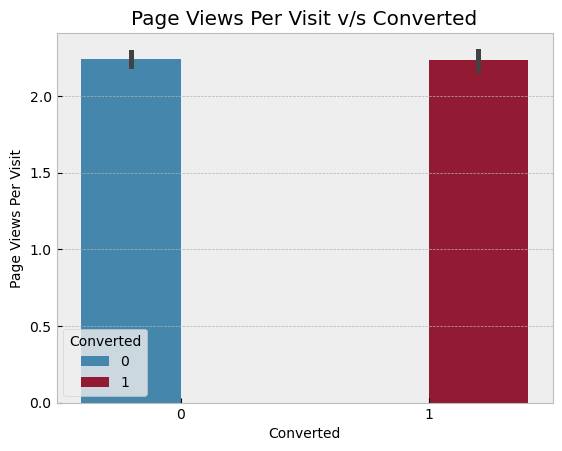

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::




In [63]:
# plotting barplot of all the numerical columns using for loop
for num_var in num_vars:
    print(sns.barplot(x= 'Converted', y=num_var , data=lead_data,hue='Converted'))
    plt.title(num_var +" v/s Converted")
    plt.show()
    print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::\n\n')

## INFERENCE: 

#### 1)Lead Origin

1.1) API and Landing Page Submission have 12.4-19.2 % conversion rate but count of lead originated from them are considerable.
    
1.2) Lead Add Form has good conversion rate but count of lead are not very high.
  
1.3) Lead Import are very less in count

#### 2) Lead Source

2.1) Google and Direct traffic generates maximum number of leads.

2.2)Conversion Rate of reference leads and leads through welingak website is high.

#### 3) Last Activity

3.1)Most of the lead have their Email opened as their last activity and has approx 35% conversion rate

3.2)Conversion rate for leads with last activity as SMS Sent is almost 60%.

#### 4) Specialization

4.1)Focus should be more on the Specialization with high conversion rate.

#### 5) What is your current occupation

5.1)Working Professionals going for the course have high chances of joining it.

5.2)Unemployed leads are the most in numbers but has around 30-35% conversion rate and are maximum in number of leads

#### 6) A free copy of Mastering the Interview

6.1) Those who said no contibutes to maximum in number of leads and has conversion rate of 40%

6.2) Those who said yes have a conversion rate of approx 30%

#### 7)  Last Notable Activity

7.1) Modified , email sent and email opened contributes maximum lead

7.2) SMS sent has highest conversion rate 

#### 8) Bivariate analysis inferences

8.1) Total Visit v/s Converted has almost comparable number of converted and non-converted leads

8.2) Total Time Spent On Website v/s Converted has more number of converted leads as compared to not converted

8.3) Page View per Visit v/s Converted also has comparable number of converted and non-converted leads

### 3) Analysing continuous numerical variables 

<Figure size 1000x1500 with 0 Axes>

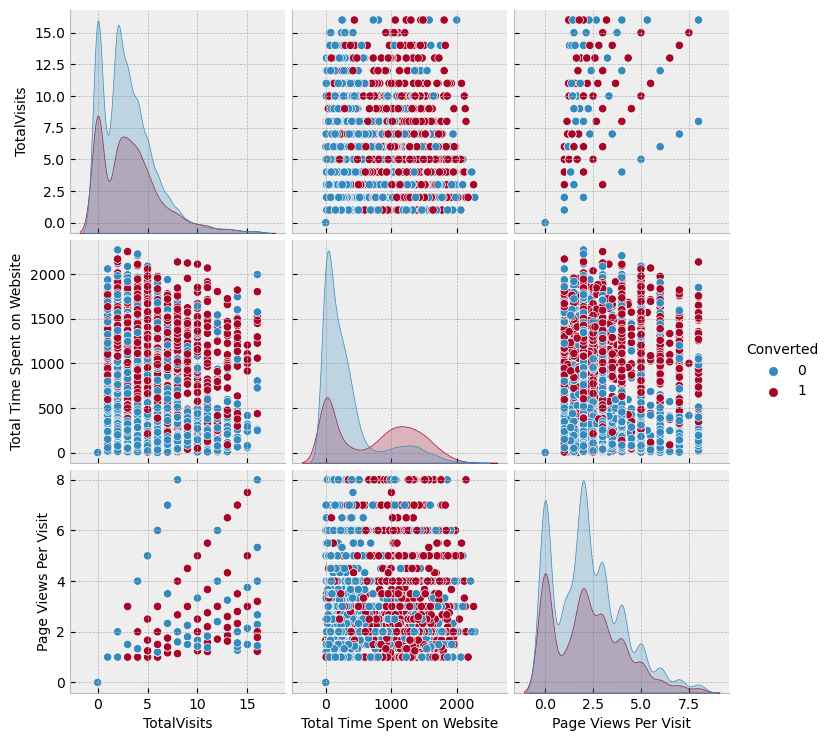

In [64]:
# visualising numerical variables behaviour wrt to each other
plt.figure(figsize=(10,15))
sns.pairplot(data=lead_data,vars=num_vars, diag_kind='kde',hue='Converted')
plt.show()

### 4) Multivariate Analysis

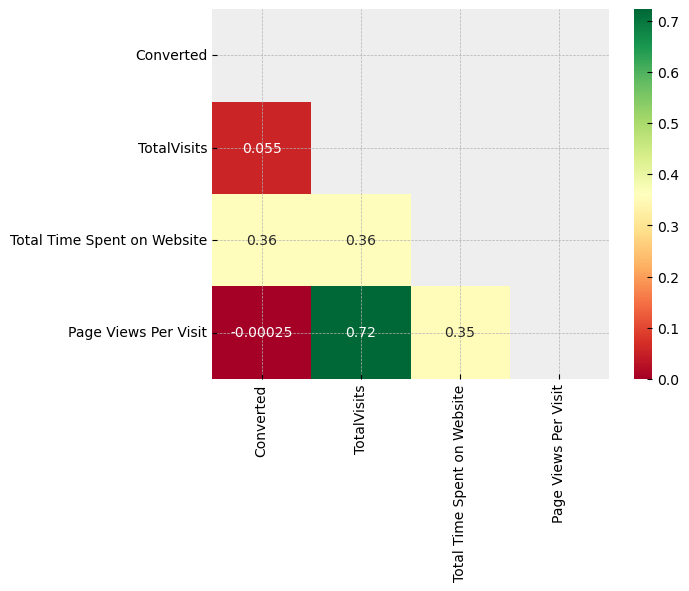

In [65]:
# plotting a heatmap for the lead dataset
matrix = np.triu(lead_data.corr())
sns.heatmap(lead_data.corr(),annot= True,cmap='RdYlGn',mask=matrix)
plt.show()

As we can see from the heatmap above, there is high correlation between 'TotalVisits' and 'Page Views Per Visit' columns apart from that no significant correlation is seen

# 3) Data Preparation

### 1) Dummy Variable Creation

Converting some binary variables (Yes/No) to 1/0

In [66]:
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].replace({'Yes':1 , 'No':0},inplace=True)

In the dataset we've seen that some columns have same string but due to different case they're treated as individual
For eg: in lead origin 'Google' and 'google' are treated as individual even though they are same

So capitalizing them so that they are treated as single entity

In [67]:
for col in cat_cols:
    lead_data[col]=lead_data[col].str.capitalize()

In [68]:
# checking unique value in each column of the dataset
for col in lead_data:
    print(col,'::')
    print(round(lead_data[col].value_counts()/len(lead_data)*100,2))
    print('-----------------------------------------------')


Lead Origin ::
Landing page submission    53.20
Api                        39.92
Lead add form               6.54
Lead import                 0.34
Name: Lead Origin, dtype: float64
-----------------------------------------------
Lead Source ::
Google               31.91
Direct traffic       27.98
Olark chat           19.73
Organic search       12.06
Reference             4.99
Welingak website      1.46
Referral sites        1.27
Facebook              0.35
Bing                  0.07
Click2call            0.05
Social media          0.02
Live chat             0.02
Pay per click ads     0.01
Blog                  0.01
Welearn               0.01
Welearnblog_home      0.01
Youtubechannel        0.01
Testone               0.01
Press_release         0.01
Nc_edm                0.01
Name: Lead Source, dtype: float64
-----------------------------------------------
Converted ::
0    62.19
1    37.81
Name: Converted, dtype: float64
-----------------------------------------------
TotalVisits ::
0.0 

In [69]:
# 1. Grouping low frequency lead_source values together
lead_data['Lead Source'] = np.where(lead_data['Lead Source'].isin(['Google','Direct traffic','Olark chat',
                                                                  'Organic search','Reference',
                                                                  'Welingak website','Referral sites']), lead_data['Lead Source'],'Others')

In [70]:
# 2. Grouping low frequency Last Activity values together
lead_data["Last Activity"] = np.where(lead_data["Last Activity"].isin(['Email opened','Sms sent','Olark chat conversation',
                                                             'Page visited on website','Converted to lead','Email bounced',
                                                             'Email link clicked','Form submitted on website',
                                                             'Unreachable']),lead_data["Last Activity"],"Others")

In [71]:
# 3. Grouping low frequency Last Notable Activity values together
lead_data['Last Notable Activity'] = np.where(lead_data['Last Notable Activity'].isin(['Modified','Email opened','Sms sent',
                                                                                       'Page visited on website','Olark chat conversation',
                                                                                      'Email link clicked']),lead_data['Last Notable Activity'],'Others')

In [72]:
# checking unique value in each column of the dataset
for col in lead_data:
    print(col,'::')
    print(round(lead_data[col].value_counts()/len(lead_data)*100,2))
    print('-----------------------------------------------')


Lead Origin ::
Landing page submission    53.20
Api                        39.92
Lead add form               6.54
Lead import                 0.34
Name: Lead Origin, dtype: float64
-----------------------------------------------
Lead Source ::
Google              31.91
Direct traffic      27.98
Olark chat          19.73
Organic search      12.06
Reference            4.99
Welingak website     1.46
Referral sites       1.27
Others               0.60
Name: Lead Source, dtype: float64
-----------------------------------------------
Converted ::
0    62.19
1    37.81
Name: Converted, dtype: float64
-----------------------------------------------
TotalVisits ::
0.0     24.38
2.0     18.94
3.0     14.74
4.0     12.64
5.0      8.83
6.0      5.26
1.0      4.46
7.0      3.49
8.0      2.53
9.0      1.34
10.0     1.03
11.0     0.77
13.0     0.49
12.0     0.45
14.0     0.30
16.0     0.20
15.0     0.16
Name: TotalVisits, dtype: float64
-----------------------------------------------
Total Time Spent

In [73]:
#creating dummy variables and displaying first 5 rows to inspect the dataset
lead_data = pd.get_dummies(data=lead_data , columns=cat_cols ,drop_first=True)
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing page submission,Lead Origin_Lead add form,Lead Origin_Lead import,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working professional,Last Notable Activity_Email opened,Last Notable Activity_Modified,Last Notable Activity_Olark chat conversation,Last Notable Activity_Others,Last Notable Activity_Page visited on website,Last Notable Activity_Sms sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### 2) Train-Test Splitting

In [74]:
np.random.seed(0)
lead_data_train , lead_data_test = train_test_split(lead_data , train_size=0.70, random_state=100)

In [75]:
# checking shape train and test dataset
print('training dataset::' , lead_data_train.shape)
print('testing dataset::' , lead_data_test.shape)

training dataset:: (6204, 52)
testing dataset:: (2659, 52)


In [76]:
# inspect training dataset
lead_data_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing page submission,Lead Origin_Lead add form,Lead Origin_Lead import,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working professional,Last Notable Activity_Email opened,Last Notable Activity_Modified,Last Notable Activity_Olark chat conversation,Last Notable Activity_Others,Last Notable Activity_Page visited on website,Last Notable Activity_Sms sent
5425,1,3.0,143,3.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8586,0,4.0,348,4.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4631,0,5.0,357,2.5,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4464,0,3.0,187,1.5,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2058,0,7.0,151,1.4,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### 3) Feature scaling of Continuous Variables

In [77]:
# creating a list all the columns with numerical values
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# scaling variables using MinMax Scaler
scaler = MinMaxScaler()

lead_data_train[num_vars] = scaler.fit_transform(lead_data_train[num_vars])

# inspecting dataset after scaling
lead_data_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing page submission,Lead Origin_Lead add form,Lead Origin_Lead import,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working professional,Last Notable Activity_Email opened,Last Notable Activity_Modified,Last Notable Activity_Olark chat conversation,Last Notable Activity_Others,Last Notable Activity_Page visited on website,Last Notable Activity_Sms sent
5425,1,0.1875,0.064241,0.3750,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8586,0,0.2500,0.156334,0.5000,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4631,0,0.3125,0.160377,0.3125,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4464,0,0.1875,0.084007,0.1875,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2058,0,0.4375,0.067835,0.1750,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [78]:
lead_data_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing page submission,Lead Origin_Lead add form,Lead Origin_Lead import,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working professional,Last Notable Activity_Email opened,Last Notable Activity_Modified,Last Notable Activity_Olark chat conversation,Last Notable Activity_Others,Last Notable Activity_Page visited on website,Last Notable Activity_Sms sent
count,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,...,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000,6204.000000
mean,0.377337,0.191691,0.215340,0.278304,0.537395,0.067537,0.002901,0.315925,0.193585,0.118956,...,0.001451,0.024017,0.898453,0.074468,0.304159,0.365893,0.020632,0.016925,0.033043,0.240329
std,0.484759,0.174070,0.244821,0.229179,0.498640,0.250970,0.053790,0.464921,0.395139,0.323762,...,0.038063,0.153113,0.302077,0.262552,0.460087,0.481718,0.142160,0.128999,0.178764,0.427318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.062500,0.002246,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.187500,0.107592,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.250000,0.407570,0.375000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4) Dividing train dataset into X and Y sets

In [79]:
y_train = lead_data_train.pop('Converted')
X_train = lead_data_train

In [80]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing page submission', 'Lead Origin_Lead add form',
       'Lead Origin_Lead import', 'Lead Source_Google',
       'Lead Source_Olark chat', 'Lead Source_Organic search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Last Activity_Email bounced', 'Last Activity_Email link clicked',
       'Last Activity_Email opened', 'Last Activity_Form submitted on website',
       'Last Activity_Olark chat conversation', 'Last Activity_Others',
       'Last Activity_Page visited on website', 'Last Activity_Sms sent',
       'Last Activity_Unreachable', 'Specialization_Business administration',
       'Specialization_E-business', 'Specialization_E-commerce',
       'Specialization_Finance management',
       'Specialization_Healthcare management',
       'Specialization_Hospitality management',
       'Specialization_H

# Building Model

### Feature elimination

Using RFE to eliminate some feature variable which will not be helpful in model building (automated approach)

In [81]:
# Running RFE with 20 feature variable 
logreg = LogisticRegression()

rfe = RFE(logreg , n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [82]:
# columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing page submission', True, 1),
 ('Lead Origin_Lead add form', True, 1),
 ('Lead Origin_Lead import', False, 9),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark chat', True, 1),
 ('Lead Source_Organic search', False, 32),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral sites', False, 34),
 ('Lead Source_Welingak website', True, 1),
 ('Last Activity_Email bounced', True, 1),
 ('Last Activity_Email link clicked', False, 14),
 ('Last Activity_Email opened', False, 5),
 ('Last Activity_Form submitted on website', False, 35),
 ('Last Activity_Olark chat conversation', True, 1),
 ('Last Activity_Others', False, 16),
 ('Last Activity_Page visited on website', False, 17),
 ('Last Activity_Sms sent', False, 4),
 ('Last Activity_Unreachable', False, 15),
 ('Specialization_Business administration', False, 20),
 ('S

In [83]:
# Features selected by RFE
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing page submission', 'Lead Origin_Lead add form',
       'Lead Source_Olark chat', 'Lead Source_Welingak website',
       'Last Activity_Email bounced', 'Last Activity_Olark chat conversation',
       'Specialization_Other', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working professional',
       'Last Notable Activity_Others', 'Last Notable Activity_Sms sent'],
      dtype='object')

In [84]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Lead import', 'Lead Source_Google',
       'Lead Source_Organic search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral sites',
       'Last Activity_Email link clicked', 'Last Activity_Email opened',
       'Last Activity_Form submitted on website', 'Last Activity_Others',
       'Last Activity_Page visited on website', 'Last Activity_Sms sent',
       'Last Activity_Unreachable', 'Specialization_Business administration',
       'Specialization_E-business', 'Specialization_E-commerce',
       'Specialization_Finance management',
       'Specialization_Healthcare management',
       'Specialization_Hospitality management',
       'Specialization_Human resource management',
       'Specialization_International business',
       'Specialization_It projects management',
       'Specialization_Marketing management',
       'Specialization_Media and advertising',
       'Specialization_Operations management',
       'S

In [85]:
# Defining a funtion to calculated the VIF for selected feature variables
def vifcal(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [86]:
# creating a list of RFE selected feature variables 
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing page submission', 'Lead Origin_Lead add form',
       'Lead Source_Olark chat', 'Lead Source_Welingak website',
       'Last Activity_Email bounced', 'Last Activity_Olark chat conversation',
       'Specialization_Other', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working professional',
       'Last Notable Activity_Others', 'Last Notable Activity_Sms sent'],
      dtype='object')

### Model-1

Building Machine Learning Model using Statsmodel for detailed statistics and manual tuning

In [87]:
# Building 1st model
X_train_sm = sm.add_constant(X_train[cols])
logmod1 = sm.GLM(y_train,X_train_sm , family = sm.families.Binomial())
res1 = logmod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.2
Date:                Mon, 20 Nov 2023   Deviance:                       5088.4
Time:                        22:01:41   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3967
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5480      0.706     -0.777      0.437      -1.931       0.835
TotalVisits                                              1.3132      0.248      5.300      0.000       0.828       1.799
Total Time Spent on Website                              4.5129      0.166     27.185      0.000       4.187       4.838
Lead Origin_Landing page submission                     -1.2162      0.133     -9.117      0.000      -1.478      -0.955
Lead Origin_Lead add form                                3.5938      0.247     14.522      0.000       3.109       4.079
Lead Source_Olark chat                                   1.3986      0.136     10.309      0.000       1.133       1.665
Lead Source_Welingak website                             3.1915      1.035      3.082      0.002       1.162       5.221
Last Activity_Email bounced                             -2.0308      0.360     -5.634      0.000      -2.737      -1.324
Last Activity_Olark chat conversation                   -1.4174      0.167     -8.512      0.000      -1.744      -1.091
Specialization_Other                                    -1.0974      0.129     -8.526      0.000      -1.350      -0.845
What is your current occupation_Housewife               22.2821   1.64e+04      0.001      0.999   -3.21e+04    3.21e+04
What is your current occupation_Student                 -0.7576      0.725     -1.045      0.296      -2.179       0.663
What is your current occupation_Unemployed              -1.1874      0.691     -1.718      0.086      -2.542       0.167
What is your current occupation_Working professional     1.4860      0.715      2.077      0.038       0.084       2.888
Last Notable Activity_Others                             1.1979      0.281      4.260      0.000       0.647       1.749
Last Notable Activity_Sms sent                           1.6221      0.081     20.024      0.000       1.463       1.781
========================================================================================================================
"""

In [88]:
# Running the function to calculate VIF for the model
vifcal(X_train[cols])

,Feature,VIF
11,What is your current occupation_Unemployed,16.86
2,Lead Origin_Landing page submission,7.55
8,Specialization_Other,4.82
0,TotalVisits,3.60
4,Lead Source_Olark chat,2.72
1,Total Time Spent on Website,2.35
12,What is your current occupation_Working profes...,2.23
3,Lead Origin_Lead add form,2.22
7,Last Activity_Olark chat conversation,1.47
10,What is your current occupation_Student,1.47


Feature Variable 'What is your current occupation_Housewife' has p-value > 0.05 , so dropping it 

In [89]:
cols = cols.drop('What is your current occupation_Housewife',1)

### Model-2

In [90]:
# Let's re-run the model with selected variabels and building 2nd model
X_train_sm = sm.add_constant(X_train[cols])
logmod2 = sm.GLM(y_train,X_train_sm , family = sm.families.Binomial())
res2 = logmod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.7
Date:                Mon, 20 Nov 2023   Deviance:                       5093.5
Time:                        22:01:55   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3962
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1961      0.659      0.298      0.766      -1.096       1.488
TotalVisits                                              1.2977      0.248      5.241      0.000       0.812       1.783
Total Time Spent on Website                              4.5073      0.166     27.168      0.000       4.182       4.833
Lead Origin_Landing page submission                     -1.2123      0.133     -9.088      0.000      -1.474      -0.951
Lead Origin_Lead add form                                3.5925      0.247     14.521      0.000       3.108       4.077
Lead Source_Olark chat                                   1.3942      0.136     10.280      0.000       1.128       1.660
Lead Source_Welingak website                             3.1889      1.035      3.080      0.002       1.160       5.218
Last Activity_Email bounced                             -2.0309      0.360     -5.636      0.000      -2.737      -1.325
Last Activity_Olark chat conversation                   -1.4161      0.166     -8.507      0.000      -1.742      -1.090
Specialization_Other                                    -1.0965      0.129     -8.520      0.000      -1.349      -0.844
What is your current occupation_Student                 -1.4991      0.679     -2.207      0.027      -2.830      -0.168
What is your current occupation_Unemployed              -1.9283      0.643     -2.997      0.003      -3.189      -0.667
What is your current occupation_Working professional     0.7439      0.669      1.112      0.266      -0.567       2.055
Last Notable Activity_Others                             1.1961      0.281      4.251      0.000       0.645       1.748
Last Notable Activity_Sms sent                           1.6212      0.081     20.020      0.000       1.463       1.780
========================================================================================================================
"""

In [91]:
# Running the function to calculate VIF for the new model
vifcal(X_train[cols])

,Feature,VIF
10,What is your current occupation_Unemployed,16.64
2,Lead Origin_Landing page submission,7.46
8,Specialization_Other,4.79
0,TotalVisits,3.59
4,Lead Source_Olark chat,2.71
1,Total Time Spent on Website,2.34
11,What is your current occupation_Working profes...,2.21
3,Lead Origin_Lead add form,2.19
7,Last Activity_Olark chat conversation,1.47
9,What is your current occupation_Student,1.47


Feature Variable 'What is your current occupation_Working professional' has p-value >0.05 so dropping it 

In [92]:
cols = cols.drop('What is your current occupation_Working professional',1)

### Model-3

In [93]:
# Let's re-run the model with selected variables and building 3rd model
X_train_sm = sm.add_constant(X_train[cols])
logmod3 = sm.GLM(y_train,X_train_sm , family = sm.families.Binomial())
res3 = logmod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.3
Date:                Mon, 20 Nov 2023   Deviance:                       5094.6
Time:                        22:02:06   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.8913      0.228      3.916      0.000       0.445       1.338
TotalVisits                                    1.2929      0.248      5.223      0.000       0.808       1.778
Total Time Spent on Website                    4.5062      0.166     27.161      0.000       4.181       4.831
Lead Origin_Landing page submission           -1.2142      0.133     -9.101      0.000      -1.476      -0.953
Lead Origin_Lead add form                      3.5910      0.247     14.516      0.000       3.106       4.076
Lead Source_Olark chat                         1.3929      0.136     10.272      0.000       1.127       1.659
Lead Source_Welingak website                   3.1890      1.035      3.080      0.002       1.160       5.218
Last Activity_Email bounced                   -2.0258      0.360     -5.632      0.000      -2.731      -1.321
Last Activity_Olark chat conversation         -1.4139      0.166     -8.500      0.000      -1.740      -1.088
Specialization_Other                          -1.0987      0.129     -8.536      0.000      -1.351      -0.846
What is your current occupation_Student       -2.1915      0.286     -7.651      0.000      -2.753      -1.630
What is your current occupation_Unemployed    -2.6208      0.185    -14.148      0.000      -2.984      -2.258
Last Notable Activity_Others                   1.1971      0.281      4.256      0.000       0.646       1.748
Last Notable Activity_Sms sent                 1.6232      0.081     20.057      0.000       1.465       1.782
==============================================================================================================
"""

In [94]:
# Running the function to calculate VIF for the new model
vifcal(X_train[cols])

,Feature,VIF
10,What is your current occupation_Unemployed,9.06
2,Lead Origin_Landing page submission,5.42
8,Specialization_Other,4.01
0,TotalVisits,3.23
4,Lead Source_Olark chat,2.27
1,Total Time Spent on Website,2.15
3,Lead Origin_Lead add form,1.54
7,Last Activity_Olark chat conversation,1.47
12,Last Notable Activity_Sms sent,1.43
5,Lead Source_Welingak website,1.34


Dropping 'What is your current occupation_Unemployed' as it's VIF is greater than 5

In [95]:
cols = cols.drop('What is your current occupation_Unemployed',1)

###  Model-4

In [96]:
# Let's re-run the model with selected variabels and building 4th model
X_train_sm = sm.add_constant(X_train[cols])
logmod4 = sm.GLM(y_train,X_train_sm , family = sm.families.Binomial())
res4 = logmod4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2689.1
Date:                Mon, 20 Nov 2023   Deviance:                       5378.1
Time:                        22:02:17   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3678
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3443      0.147     -9.119      0.000      -1.633      -1.055
TotalVisits                                 1.1734      0.240      4.883      0.000       0.702       1.644
Total Time Spent on Website                 4.5274      0.161     28.044      0.000       4.211       4.844
Lead Origin_Landing page submission        -1.3719      0.129    -10.632      0.000      -1.625      -1.119
Lead Origin_Lead add form                   3.6732      0.242     15.171      0.000       3.199       4.148
Lead Source_Olark chat                      1.3749      0.133     10.355      0.000       1.115       1.635
Lead Source_Welingak website                3.0381      1.035      2.936      0.003       1.010       5.066
Last Activity_Email bounced                -1.9903      0.345     -5.774      0.000      -2.666      -1.315
Last Activity_Olark chat conversation      -1.4183      0.163     -8.688      0.000      -1.738      -1.098
Specialization_Other                       -1.4324      0.125    -11.451      0.000      -1.678      -1.187
What is your current occupation_Student     0.2703      0.228      1.186      0.236      -0.176       0.717
Last Notable Activity_Others                1.2312      0.269      4.577      0.000       0.704       1.758
Last Notable Activity_Sms sent              1.6270      0.079     20.715      0.000       1.473       1.781
===========================================================================================================
"""

In [97]:
# Running the function to calculate VIF for the new model
vifcal(X_train[cols])

,Feature,VIF
0,TotalVisits,2.95
2,Lead Origin_Landing page submission,2.94
8,Specialization_Other,2.36
1,Total Time Spent on Website,2.12
4,Lead Source_Olark chat,2.02
7,Last Activity_Olark chat conversation,1.47
11,Last Notable Activity_Sms sent,1.43
3,Lead Origin_Lead add form,1.40
5,Lead Source_Welingak website,1.34
6,Last Activity_Email bounced,1.15


Dropping feature variable 'What is your current occupation_Student' as it's p-value greater then 0.05

In [98]:
cols = cols.drop('What is your current occupation_Student',1)

### Model-5

In [99]:
# Let's re-run the model with selected variables and building 5th model
X_train_sm = sm.add_constant(X_train[cols])
logmod5 = sm.GLM(y_train,X_train_sm , family = sm.families.Binomial())
res5 = logmod5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6192
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2689.8
Date:                Mon, 20 Nov 2023   Deviance:                       5379.5
Time:                        22:02:29   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3421      0.147     -9.105      0.000      -1.631      -1.053
TotalVisits                               1.1710      0.240      4.874      0.000       0.700       1.642
Total Time Spent on Website               4.5290      0.161     28.052      0.000       4.213       4.845
Lead Origin_Landing page submission      -1.3665      0.129    -10.597      0.000      -1.619      -1.114
Lead Origin_Lead add form                 3.6792      0.242     15.202      0.000       3.205       4.154
Lead Source_Olark chat                    1.3798      0.133     10.396      0.000       1.120       1.640
Lead Source_Welingak website              3.0287      1.035      2.927      0.003       1.000       5.057
Last Activity_Email bounced              -1.9873      0.345     -5.765      0.000      -2.663      -1.312
Last Activity_Olark chat conversation    -1.4148      0.163     -8.671      0.000      -1.735      -1.095
Specialization_Other                     -1.4307      0.125    -11.435      0.000      -1.676      -1.185
Last Notable Activity_Others              1.2254      0.269      4.556      0.000       0.698       1.753
Last Notable Activity_Sms sent            1.6238      0.078     20.694      0.000       1.470       1.778
=========================================================================================================
"""

In [100]:
# Running the function to calculate VIF for the new model
vifcal(X_train[cols])

,Feature,VIF
0,TotalVisits,2.95
2,Lead Origin_Landing page submission,2.92
8,Specialization_Other,2.36
1,Total Time Spent on Website,2.12
4,Lead Source_Olark chat,2.02
7,Last Activity_Olark chat conversation,1.47
10,Last Notable Activity_Sms sent,1.43
3,Lead Origin_Lead add form,1.39
5,Lead Source_Welingak website,1.34
6,Last Activity_Email bounced,1.15


As we can see that for all the feature variable p-value is less than 0.05 and VIF is less than 5 , so Model-5 is our final model

In [101]:
# Getting the predicted value on the train set
y_train_pred = res5.predict(X_train_sm)
y_train_pred[:10]

5425    0.360226
8586    0.024241
4631    0.165708
4464    0.366082
2058    0.131347
1719    0.178167
2286    0.801334
1433    0.256369
5550    0.056903
8333    0.100182
dtype: float64

In [102]:
# reshaping the predicted values in an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36022631, 0.02424102, 0.1657078 , 0.36608173, 0.13134654,
       0.17816725, 0.80133432, 0.25636898, 0.0569031 , 0.10018228])

#### Creating a dataframe with actual converted flag and predicted probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values , 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect_id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect_id
0,1,0.360226,5425
1,0,0.024241,8586
2,0,0.165708,4631
3,0,0.366082,4464
4,0,0.131347,2058


Choosing an arbitrary cut-off probability point of 0.3 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.3 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect_id,predicted
0,1,0.360226,5425,1
1,0,0.024241,8586,0
2,0,0.165708,4631,0
3,0,0.366082,4464,1
4,0,0.131347,2058,0


Calculating lead score of each lead

In [105]:
y_train_pred_final['Lead_score'] = y_train_pred_final.Converted_prob*100
y_train_pred_final.head()

,Converted,Converted_prob,Prospect_id,predicted,Lead_score
0,1,0.360226,5425,1,36.022631
1,0,0.024241,8586,0,2.424102
2,0,0.165708,4631,0,16.570780
3,0,0.366082,4464,1,36.608173
4,0,0.131347,2058,0,13.134654


### Confusion matrix

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.predicted)
confusion

array([[2904,  959],
       [ 385, 1956]], dtype=int64)

In [107]:
# Predicted     not_converted    converted
# Actual
# not_converted        2904        959
# converted            385        1956  

In [108]:
# defining a function to calculate all the evaluation parameters of the final model
def eval_params(conf_matrix):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    acc = round((TN+TP) / float(TN+TP+FN+FP), 3)
    sensi = round(TP / float(TP+FN), 3)
    speci = round(TN / float(TN+FP),3)
    precision = round(TP / float(TP+FP),3)
    fp_rate = round((1- speci),3)
    n_pval = round(TN / float(TN+ FN),3)
    
    print('Accuracy                                =', acc)
    print('Sensitivity or Recall                   =', sensi)
    print('Specificity                             =', speci)
    print('Precision  or Positive Predictive Value =', precision)
    print('False Positive Rate                     =', fp_rate)
    print('Negative Predictive Value               =', n_pval)                

In [109]:
eval_params(confusion)

Accuracy                                = 0.783
Sensitivity or Recall                   = 0.836
Specificity                             = 0.752
Precision  or Positive Predictive Value = 0.671
False Positive Rate                     = 0.248
Negative Predictive Value               = 0.883


In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

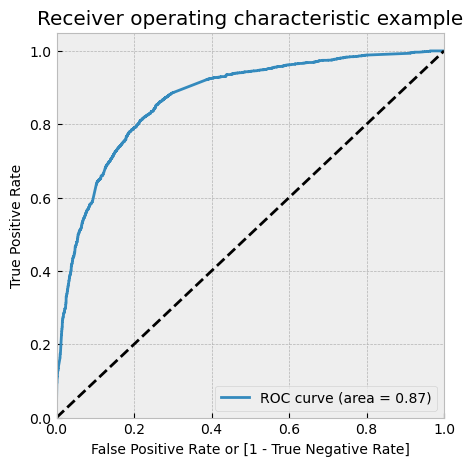

In [111]:
# Drawing ROC curve for train set
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

As we can see that the area under curve is 0.87 , so our final model is good to go

### Step 10: Finding Optimal Cutoff Point

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect_id,predicted,Lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.360226,5425,1,36.022631,1,1,1,1,0,0,0,0,0,0
1,0,0.024241,8586,0,2.424102,1,0,0,0,0,0,0,0,0,0
2,0,0.165708,4631,0,16.570780,1,1,0,0,0,0,0,0,0,0
3,0,0.366082,4464,1,36.608173,1,1,1,1,0,0,0,0,0,0
4,0,0.131347,2058,0,13.134654,1,1,0,0,0,0,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.575435  0.968817  0.337044
0.2   0.2  0.769826  0.885946  0.699456
0.3   0.3  0.783366  0.835540  0.751747
0.4   0.4  0.799162  0.770184  0.816723
0.5   0.5  0.801741  0.685604  0.872120
0.6   0.6  0.786106  0.560444  0.922858
0.7   0.7  0.769826  0.474584  0.948744
0.8   0.8  0.742585  0.369927  0.968418
0.9   0.9  0.705513  0.243059  0.985762


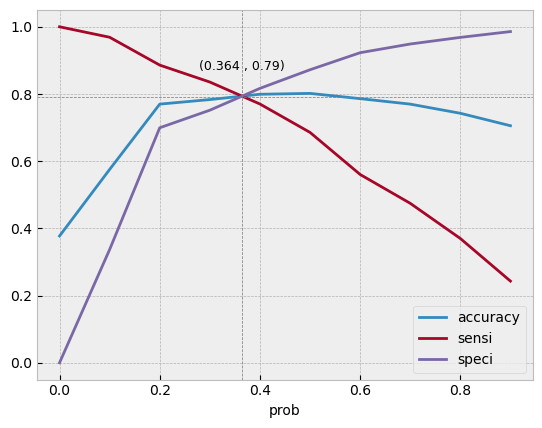

In [114]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

#### From the curve above, 0.364 is the optimum point to take it as a cutoff probability.

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.364 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect_id,predicted,Lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.360226,5425,1,36.022631,1,1,1,1,0,0,0,0,0,0,0
1,0,0.024241,8586,0,2.424102,1,0,0,0,0,0,0,0,0,0,0
2,0,0.165708,4631,0,16.570780,1,1,0,0,0,0,0,0,0,0,0
3,0,0.366082,4464,1,36.608173,1,1,1,1,0,0,0,0,0,0,1
4,0,0.131347,2058,0,13.134654,1,1,0,0,0,0,0,0,0,0,0


### Confusion matrix for the train set

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3064,  799],
       [ 477, 1864]], dtype=int64)

In [117]:
# Predicted     not_converted    converted
# Actual
# not_converted        3064        799
# converted            477        1864  

In [118]:
eval_params(confusion2)

Accuracy                                = 0.783
Sensitivity or Recall                   = 0.836
Specificity                             = 0.752
Precision  or Positive Predictive Value = 0.671
False Positive Rate                     = 0.248
Negative Predictive Value               = 0.883


# Precision and Recall

In [119]:
p_score = round(precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)
r_score = round(recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.7
Recall score    = 0.7962


### Precision-Recall tradeoff curve

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

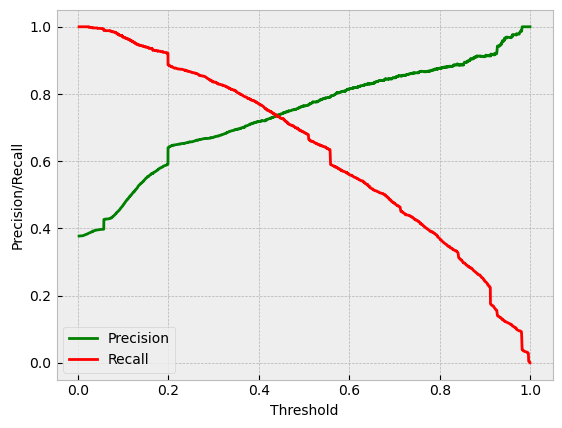

In [121]:
# plotting Precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')

# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The above graph shows the trade-off between the Precision and Recall

# Making predictions on the test set

In [122]:
# splitting test dataset into X and y
y_test = lead_data_test.pop('Converted')
X_test = lead_data_test

In [123]:
# creating a list of all the numerical variables in test dataset
numvars = X_test.select_dtypes(include=['int64','float64']).columns


X_test[numvars] = scaler.transform(X_test[numvars])
X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing page submission,Lead Origin_Lead add form,Lead Source_Olark chat,Lead Source_Welingak website,Last Activity_Email bounced,Last Activity_Olark chat conversation,Specialization_Other,Last Notable Activity_Others,Last Notable Activity_Sms sent
8788,0.3750,0.618598,1,0,0,0,0,0,0,0,1
7813,0.1875,0.116801,1,0,0,0,0,0,0,0,0
2403,0.8750,0.639712,1,0,0,0,0,0,0,0,1
7243,0.3125,0.509883,0,0,0,0,0,0,1,0,0
5363,0.2500,0.721473,1,0,0,0,0,0,0,0,1


In [124]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [125]:
y_test_pred = res5.predict(X_test_sm)
y_test_pred[:10]

8788    0.896216
7813    0.123457
2403    0.944643
7243    0.475607
5363    0.922400
3918    0.473874
3345    0.198926
917     0.159400
7732    0.077709
1702    0.095959
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
8788,0.896216
7813,0.123457
2403,0.944643
7243,0.475607
5363,0.922400


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
8788,0
7813,0
2403,1
7243,1
5363,1


In [128]:
# Putting CustID to index
y_test_df['Prospect_id'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect_id,0
0,0,8788,0.896216
1,0,7813,0.123457
2,1,2403,0.944643
3,1,7243,0.475607
4,1,5363,0.922400


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_id','Converted','Converted_prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect_id,Converted,Converted_prob
0,8788,0,0.896216
1,7813,0,0.123457
2,2403,1,0.944643
3,7243,1,0.475607
4,5363,1,0.922400


In [130]:
# Taking sensitivity-specificity method at 0.3 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.364 else 0)
y_pred_final.head()

,Prospect_id,Converted,Converted_prob,final_predicted
0,8788,0,0.896216,1
1,7813,0,0.123457,0
2,2403,1,0.944643,1
3,7243,1,0.475607,1
4,5363,1,0.922400,1


In [131]:
# Adding Lead Score for Test set
y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].map( lambda x: round(x*100,2))
y_pred_final.head()

,Prospect_id,Converted,Converted_prob,final_predicted,Lead_Score
0,8788,0,0.896216,1,89.62
1,7813,0,0.123457,0,12.35
2,2403,1,0.944643,1,94.46
3,7243,1,0.475607,1,47.56
4,5363,1,0.922400,1,92.24


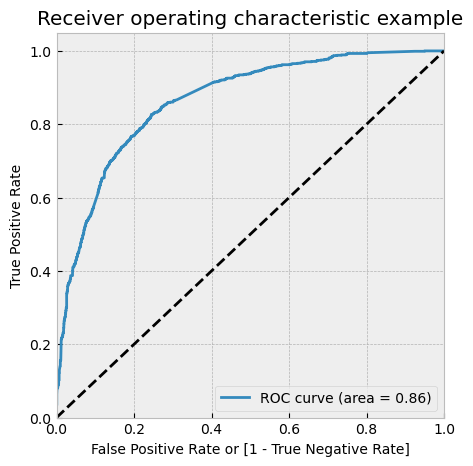

In [132]:
# Drawing ROC curve for test set
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False)
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

In [133]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1303,  346],
       [ 221,  789]], dtype=int64)

In [134]:
# Actual/Predicted      not_converted      converted  
# not_converted             1303               346
# converted                  221               789

In [135]:
eval_params(confusion_test)

Accuracy                                = 0.783
Sensitivity or Recall                   = 0.836
Specificity                             = 0.752
Precision  or Positive Predictive Value = 0.671
False Positive Rate                     = 0.248
Negative Predictive Value               = 0.883


Finding out the leads which should be contacted

# Results

### 1) Comparing the values obtained for Train & Test dataset :¶

##### Train Data:

1:Accuracy : 78.3%

2:Sensitivity : 83.6 %

3:Specificity : 75.2 %


##### Test Data:

1:Accuracy : 78.3%

2:Sensitivity : 83.6 %

3:Specificity : 75.2 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate above 80% .

### Finding the Hot Leads

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 80. They can be termed as 'Hot Leads'.

In [136]:
# creating a separate dataframe for hotleads
hot_leads = y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect_id,Converted,Converted_prob,final_predicted,Lead_Score
0,8788,0,0.896216,1,89.62
2,2403,1,0.944643,1,94.46
4,5363,1,0.922400,1,92.24
18,6423,1,0.996161,1,99.62
19,809,0,0.911898,1,91.19
...,...,...,...,...,...
2628,572,1,0.861493,1,86.15
2632,6784,1,0.946767,1,94.68
2638,2126,1,0.911898,1,91.19
2640,2598,1,0.926223,1,92.62


So there are 434 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are 

In [137]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect_id"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([8788, 2403, 5363, 6423,  809, 6040, 4295, 8397, 4301, 5387, 2489,
       1462, 1190, 1332, 7098, 5979, 4531, 9026, 3810,  249, 1010, 4837,
       5270, 4812, 5451, 4030, 4860, 4360,  400, 8110, 7187, 6309, 3942,
       8180, 6728, 8804, 4955, 8504, 7250, 2684,  205, 1299, 7818,  560,
       4436, 5931, 2982, 5753, 5647, 3321, 5015, 4983, 5769, 7490, 3660,
       8461, 6466, 7008, 2677, 6170, 4782, 8556, 1416, 8090, 2140, 2343,
       3952, 4693, 4885, 4977, 3152, 7432, 5699, 4791, 8147, 2643, 8509,
       3494, 8499, 7036, 1859, 8976, 8366, 6080,  739, 8505, 7501, 3310,
       7210, 8070, 3710, 2490, 1614, 8801, 7989, 1978, 7472, 6046, 4004,
       4421, 8591, 6994,  220, 5877, 4481, 8943, 8059,  454, 7905,  262,
       3078, 7993, 4705, 1770, 5276, 5947, 1573, 5372,  373, 6906,  448,
       3758, 3069, 6698,   62, 6742, 2662, 1534, 2243, 2043, 3926, 3601,
       8759, 2547,  130, 6913, 7094, 8106, 5553, 3535, 2918,  818, 3410,
       2907, 1523, 1335, 5286, 8959, 5474, 4455, 33

#### Finding out the Important Features from our final model:

In [138]:
res5.params.sort_values(ascending=False)

Total Time Spent on Website              4.529002
Lead Origin_Lead add form                3.679173
Lead Source_Welingak website             3.028697
Last Notable Activity_Sms sent           1.623757
Lead Source_Olark chat                   1.379839
Last Notable Activity_Others             1.225414
TotalVisits                              1.171028
const                                   -1.342144
Lead Origin_Landing page submission     -1.366510
Last Activity_Olark chat conversation   -1.414802
Specialization_Other                    -1.430713
Last Activity_Email bounced             -1.987311
dtype: float64